# Team name: Delta Explorers

# Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# import the datasets from different sheers
df1 = pd.read_excel('NPRI_2000-2022.xlsx',sheet_name = "Releases 2000-2020")
df2 = pd.read_excel('NPRI_2000-2022.xlsx',sheet_name = "Disposals and Transfers 00-20")
df3 = pd.read_excel('NPRI_2000-2022.xlsx',sheet_name = "Comments")

df = pd.concat([df1, df2, df3]) # merge them together

In [2]:
# aligning NPRI data with datetime year and province grouping
df['Reporting_Year / Année'] = pd.to_datetime(
    df['Reporting_Year / Année'], format='%Y', errors='coerce'
)  # convert year to proper datetime

df = df.sort_values(
    by=['PROVINCE', 'Reporting_Year / Année']       # align within province across years
).reset_index(drop=True)

In [3]:
# get the shape
df.shape  # check dataset size

(1292471, 60)

In [4]:
# create a new copy of the dataframe
df_clean = df.copy()

In [5]:
# check the first five rows of the dataset
df_clean.head()

,Reporting_Year / Année,NPRI_ID / No_INRP,Number of employees,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,...,On-site Disposal - Landfill,On-site Disposal - Tailings Management,On-site Disposal - Underground Injection,On-site Disposal - Waste Rock management,NAICS Title EN / Titre Code SCIAN EN,NAICS Title FR / Titre Code SCIAN FR,Substance Name (French) / Nom de substance (Français),Comment_Type_Name (English) Type_de_commentaire (Anglais),Comment_Type_Name (French) Type_de_commentaire (Français),Comment / Commentaires
0,2000-01-01,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-01,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-01,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-01,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-01,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# show the datatypes
df_clean.dtypes  # type overview

,0
Reporting_Year / Année,datetime64[ns]
NPRI_ID / No_INRP,int64
Number of employees,object
Company_Name / Dénomination_sociale_de_l'entreprise,object
Facility_Name / Installation,object
NAICS / Code_SCIAN,int64
NAICS Title / Titre Code_SCIAN,object
PROVINCE,object
City,object
Latitude,float64


  # Checking data

In [7]:
# show the description of the data
df_clean.describe(include='all')  # dataset summary

,Reporting_Year / Année,NPRI_ID / No_INRP,Number of employees,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,...,On-site Disposal - Landfill,On-site Disposal - Tailings Management,On-site Disposal - Underground Injection,On-site Disposal - Waste Rock management,NAICS Title EN / Titre Code SCIAN EN,NAICS Title FR / Titre Code SCIAN FR,Substance Name (French) / Nom de substance (Français),Comment_Type_Name (English) Type_de_commentaire (Anglais),Comment_Type_Name (French) Type_de_commentaire (Français),Comment / Commentaires
count,1292471,1.292471e+06,928451.0,1292471,1286664,1.292471e+06,929161,1292471,834658.0,923908.000000,...,1.827000e+04,1.607200e+04,9329.000000,4.382000e+03,363294,363294,363310,363310,363310,358956
unique,NaN,NaN,1910.0,12387,37160,NaN,475,13,4083.0,NaN,...,NaN,NaN,NaN,NaN,678,416,250,8,8,150696
top,NaN,NaN,1.0,Canadian Natural Resources Limited,(blank),NaN,Conventional oil and gas extraction,AB,0.0,NaN,...,NaN,NaN,NaN,NaN,Conventional Oil and Gas Extraction,Extraction de pétrole et de gaz par des méthod...,"PM2,5 - Matière particulaire <= 2,5 micromètres",On-site releases comment,Commentaire sur les rejets sur le site,"Due to the system used at Univar Canada, the w..."
freq,NaN,NaN,168820.0,36540,15787,NaN,129865,389929,52756.0,NaN,...,NaN,NaN,NaN,NaN,27054,39328,24336,198782,198782,1413
mean,2012-05-04 01:33:16.973858816,9.950304e+03,NaN,NaN,NaN,3.002099e+05,NaN,NaN,NaN,49.267241,...,5.675094e+03,4.849996e+04,718.124258,5.003218e+04,NaN,NaN,NaN,NaN,NaN,NaN
min,2000-01-01 00:00:00,1.000000e+00,NaN,NaN,NaN,1.111200e+05,NaN,NaN,NaN,0.000000,...,0.000000e+00,-2.607680e+02,0.000000,-2.220700e+05,NaN,NaN,NaN,NaN,NaN,NaN
25%,2007-01-01 00:00:00,3.356000e+03,NaN,NaN,NaN,2.111140e+05,NaN,NaN,NaN,45.049300,...,1.709250e-01,4.364775e+01,0.126000,7.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
50%,2013-01-01 00:00:00,6.150000e+03,NaN,NaN,NaN,3.221120e+05,NaN,NaN,NaN,49.289200,...,7.900500e+00,2.893615e+02,2.560500,1.022652e+02,NaN,NaN,NaN,NaN,NaN,NaN
75%,2018-01-01 00:00:00,1.645000e+04,NaN,NaN,NaN,3.312210e+05,NaN,NaN,NaN,53.288500,...,6.277875e+01,2.800930e+03,26.604000,1.958087e+03,NaN,NaN,NaN,NaN,NaN,NaN
max,2022-01-01 00:00:00,3.065560e+05,NaN,NaN,NaN,9.139100e+05,NaN,NaN,NaN,82.498758,...,5.070905e+06,1.895250e+07,520458.800000,2.270181e+07,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# checking the missing values before
df_clean.isna().sum()


,0
Reporting_Year / Année,0
NPRI_ID / No_INRP,0
Number of employees,364020
Company_Name / Dénomination_sociale_de_l'entreprise,0
Facility_Name / Installation,5807
NAICS / Code_SCIAN,0
NAICS Title / Titre Code_SCIAN,363310
PROVINCE,0
City,457813
Latitude,368563


# Fixing bad housekeeping

In [9]:
# checking the missing values before the replacement of irrelevant values in multiple columns
irrelevant_values = ['(blank)', 'blank', ' ', '', '-', '--', 'Unknown', 'NA', 'N/A', 'na', 'NaN']
df_clean = df_clean.replace(irrelevant_values, pd.NA)

# Handling missing values

In [10]:
# rechecking the missing values after
df_clean.isna().sum()

# checking the percentage of missing values throughout the columns
df_clean.isnull().mean() * 100  # missing percentage by column

,0
Reporting_Year / Année,0.000000
NPRI_ID / No_INRP,0.000000
Number of employees,28.178350
Company_Name / Dénomination_sociale_de_l'entreprise,0.000000
Facility_Name / Installation,1.671295
NAICS / Code_SCIAN,0.000000
NAICS Title / Titre Code_SCIAN,28.109722
PROVINCE,0.000000
City,35.772485
Latitude,28.516152


In [11]:
# imputing the number of employees missing values with median
if 'Number of employees' in df_clean.columns:
    median_val = df_clean['Number of employees'].median()  # compute median
    df_clean['Number of employees'] = df_clean['Number of employees'].fillna(median_val)
    df_clean['Number of employees'] = df_clean['Number of employees'].astype(int)

Justification of mode imputation:For categorical columns and ordinal data, mode imputation is the ideal method for handling missing values. Discrete data with clear frequent values reflect the underlying distribution while keeping the most common values present in the dataset (eg: estimation methods, latitude, longitude...)



In [12]:
# imputing object datatypes missing values with mode
columns_to_impute = [
    'City', 'Units / Unités', 'NAICS Title / Titre Code_SCIAN',
    'Facility_Name / Installation', 'Latitude', 'Longitude',
    "Estimation_Method / Méthode_d'estimation"
]

for column in columns_to_impute:
    if column in df_clean.columns and not df_clean[column].mode().empty:
        df_clean[column] = df_clean[column].fillna(df_clean[column].mode().iloc[0])  # fill most common value

Justification of median imputation: When numerical data is skewed or contains outliers, using the median values keeps the data robust so that it is not affected by extreme values. Central tendency is maintained in this case.


In [13]:
# fill continuous release/disposal/transfer columns with 0
continuous_columns = []
for column in df_clean.columns:
    if ("Release" in column) or ("Disposal" in column) or ("Transfer" in column):
        continuous_columns.append(column)  # collect numeric columns

for column in continuous_columns:
    df_clean[column] = df_clean[column].fillna(0)

In [14]:
# remove columns that are irrelevant for our chosen problem
remove_columns = [
    'NAICS Title EN / Titre Code SCIAN EN',
    'NAICS Title FR / Titre Code SCIAN FR',
    'Substance Name (French) / Nom de substance (Français)',
    'Comment_Type_Name (English) Type_de_commentaire (Anglais)',
    'Comment_Type_Name (French) Type_de_commentaire (Français)',
    'Comment / Commentaires'
]
df_clean = df_clean.drop(columns=remove_columns, errors='ignore')  # drop columns

# rechecking the missing values percentage
df_clean.isnull().mean() * 100

,0
Reporting_Year / Année,0.000000
NPRI_ID / No_INRP,0.000000
Number of employees,0.000000
Company_Name / Dénomination_sociale_de_l'entreprise,0.000000
Facility_Name / Installation,0.000000
NAICS / Code_SCIAN,0.000000
NAICS Title / Titre Code_SCIAN,0.000000
PROVINCE,0.000000
City,0.000000
Latitude,0.000000


# Handling outliers

In [15]:
# outliers for Number of Employees using IQR method
# outliers for Number of Employees using IQR method
if 'Number of employees' in df_clean.columns:
    employees_original = df_clean['Number of employees'].copy()

    q1 = df_clean['Number of employees'].quantile(0.25)
    q3 = df_clean['Number of employees'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = max(0, q1 - 1.5 * iqr)
    upper_bound = q3 + 1.5 * iqr

    df_clean['Number of employees'] = df_clean['Number of employees'].clip(
        lower=lower_bound, upper=upper_bound
    )

    print(f"Employees outliers capped at: {lower_bound:.0f} - {upper_bound:.0f}")

if 'Latitude' in df_clean.columns:
    lat_original = df_clean['Latitude'].copy()   # before
    df_clean['Latitude'] = pd.to_numeric(df_clean['Latitude'], errors='coerce')
    df_clean['Latitude'] = df_clean['Latitude'].clip(lower=41, upper=84)

if 'Longitude' in df_clean.columns:
    lon_original = df_clean['Longitude'].copy()  # before
    df_clean['Longitude'] = pd.to_numeric(df_clean['Longitude'], errors='coerce')
    df_clean['Longitude'] = df_clean['Longitude'].clip(lower=-141, upper=-52)

print("Geographic bounds applied for Canadian facilities")


Employees outliers capped at: 0 - 337
Geographic bounds applied for Canadian facilities


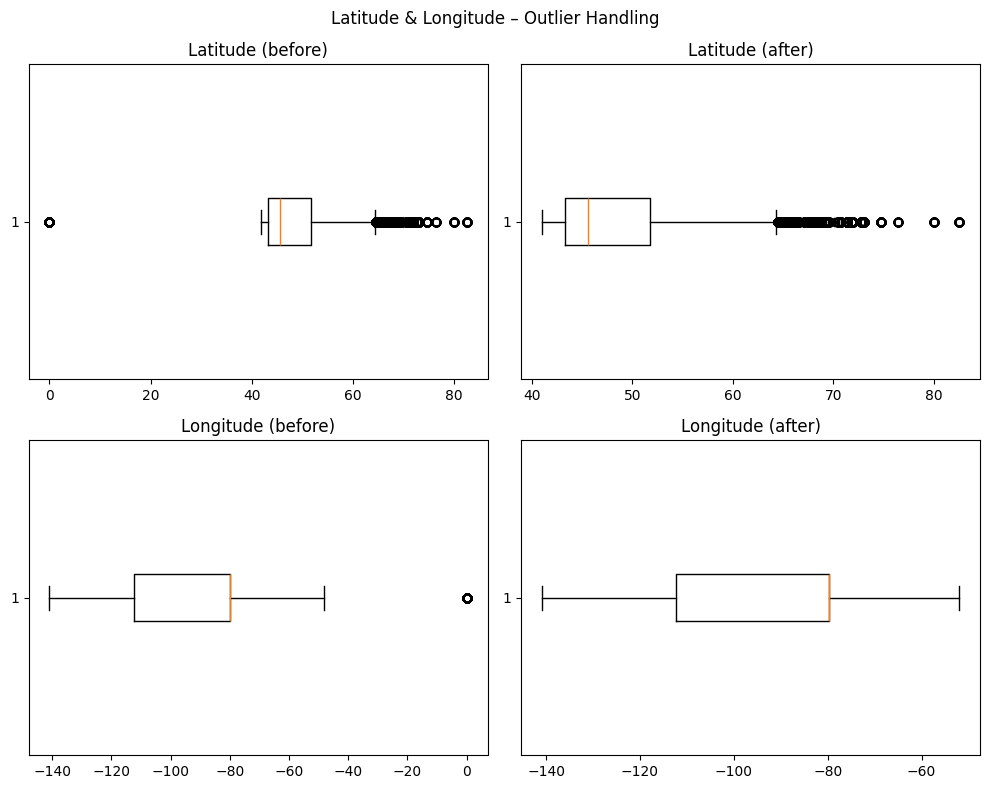

In [16]:
# Latitude & Longitude: before vs after

if 'lat_original' in globals() and 'lon_original' in globals():
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    # Latitude before
    axes[0, 0].boxplot(lat_original.dropna(), vert=False)
    axes[0, 0].set_title("Latitude (before)")

    # Latitude after
    axes[0, 1].boxplot(df_clean['Latitude'].dropna(), vert=False)
    axes[0, 1].set_title("Latitude (after)")

    # Longitude before
    axes[1, 0].boxplot(lon_original.dropna(), vert=False)
    axes[1, 0].set_title("Longitude (before)")

    # Longitude after
    axes[1, 1].boxplot(df_clean['Longitude'].dropna(), vert=False)
    axes[1, 1].set_title("Longitude (after)")

    plt.suptitle("Latitude & Longitude – Outlier Handling")
    plt.tight_layout()
    plt.show()

In [17]:
# continuous columns for analysis
continuous_columns = [
    'Release to Air - Fugitive', 'Release to Air - Other Non-Point ',
    'Release to Air - Road dust ', 'Release to Air - Spills ',
    'Release to Air - Stack / Point ', 'Release to Air - Storage / Handling ',
    'Releases to Land - Leaks', 'Releases to Land - Other ',
    'Releases to Land - Spills ', 'Releases to Water Bodies - Direct Discharges ',
    'Releases to Water Bodies - Leaks', 'Releases to Water Bodies - Spills ',
    'Off-site Disposal - Land Treatment', 'Off-site Disposal - Landfill',
    'Off-site Disposal - Storage', 'Off-site Disposal - Tailings Management',
    'Off-site Disposal - Underground Injection', 'Off-site Disposal - Waste Rock management',
    'Off-site Transfers for Recycling - Energy Recovery',
    'Off-site Transfers for Recycling - Other',
    'Off-site Transfers for Recycling - Recovery of Acids and Bases',
    'Off-site Transfers for Recycling - Recovery of Catalysts',
    'Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals)',
    'Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds',
    'Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents)',
    'Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues',
    'Off-site Transfers for Recycling - Recovery of Solvents',
    'Off-site Transfers for Recycling - Refining or Re-use of Used Oil',
    'Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment',
    'Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment',
    'Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal',
    'Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant',
    'Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment',
    'On-site Disposal - Land Treatment', 'On-site Disposal - Landfill',
    'On-site Disposal - Tailings Management', 'On-site Disposal - Underground Injection',
    'On-site Disposal - Waste Rock management'
]

# convert to numeric and handle negative values
for column in continuous_columns:
    if column in df_clean.columns:
        df_clean[column] = pd.to_numeric(df_clean[column], errors="coerce")  # convert
        df_clean[column] = np.where(df_clean[column] < 0, 0, df_clean[column])

# check min and max values
for column in continuous_columns:
    if column in df_clean.columns and df_clean[column].notna().sum() > 0:
        print(f"{column}: min={df_clean[column].min()}, max={df_clean[column].max()}")

Release to Air - Fugitive: min=0.0, max=58433.9
Release to Air - Other Non-Point : min=0.0, max=91138.2
Release to Air - Spills : min=0.0, max=1554.4
Release to Air - Storage / Handling : min=0.0, max=17883.11
Releases to Land - Leaks: min=0.0, max=39.058
Releases to Land - Other : min=0.0, max=152270.0
Releases to Land - Spills : min=0.0, max=4500.1
Releases to Water Bodies - Direct Discharges : min=0.0, max=39991.0
Releases to Water Bodies - Leaks: min=0.0, max=82.4
Releases to Water Bodies - Spills : min=0.0, max=259050.0
Off-site Disposal - Land Treatment: min=0.0, max=32702.6116
Off-site Disposal - Landfill: min=0.0, max=2562068.0
Off-site Disposal - Storage: min=0.0, max=713228.7
Off-site Disposal - Tailings Management: min=0.0, max=206521.0
Off-site Disposal - Underground Injection: min=0.0, max=431336.03
Off-site Disposal - Waste Rock management: min=0.0, max=53150.0
Off-site Transfers for Recycling - Energy Recovery: min=0.0, max=128967.0
Off-site Transfers for Recycling - Oth

Justification for outliers handling:

- Employees

Some facilities had employee numbers that were too high or too low.We used the IQR to cap them into a normal range.

- Latitude / Longitude

A few coordinates were way outside Canada. Instead of deleting rows, we just capped them into the normal Canada range.

We selected all release based columns. Negative values were replaced with 0, since real pollutant releases cannot be negative. We checked the min/max of each column to confirm the data looked reliable before further steps.

# Visualizations

In [18]:
# %%
# grouping release columns by type (AIR/LAND/WATER) sums
air_release = [
    'Release to Air - Fugitive',
    'Release to Air - Other Non-Point ',
    'Release to Air - Road dust  ',
    'Release to Air - Spills ',
    'Release to Air - Stack / Point  ',
    'Release to Air - Storage / Handling '
]

land_release = [
    'Releases to Land - Leaks',
    'Releases to Land - Other ',
    'Releases to Land - Spills '
]

water_release = [
    'Releases to Water Bodies - Direct Discharges ',
    'Releases to Water Bodies - Leaks',
    'Releases to Water Bodies - Spills '
]

# copy dataset for visualizations
visualization_df = df_clean.copy()

YEAR = "Reporting_Year / Année"
UNITS = "Units / Unités"
PROVINCE = "PROVINCE"
COMPANY = "Company_Name / Dénomination_sociale_de_l'entreprise"

# setting year to datetime
visualization_df[YEAR] = pd.to_datetime(
    visualization_df[YEAR], format="%Y", errors="coerce"
)
visualization_df["year_numeric"] = visualization_df[YEAR].dt.year

# getting totals per group
visualization_df["AIR"] = visualization_df[air_release].sum(axis=1)
visualization_df["LAND"] = visualization_df[land_release].sum(axis=1)
visualization_df["WATER"] = visualization_df[water_release].sum(axis=1)

# totals across all groups
visualization_df["TOTAL"] = (
    visualization_df["AIR"]
    + visualization_df["LAND"]
    + visualization_df["WATER"]
)

# convert all units to a common scale (tonnes) for ML
def to_tonnes(row):
    unit = row[UNITS]
    total = row["TOTAL"]
    if unit == "tonnes":
        return total
    elif unit == "kg":
        return total / 1000.0
    elif unit == "grams":
        return total / 1_000_000.0
    elif unit == "g TEQ":
        # treat as tonnes-equivalent for trend purposes
        return total / 1_000_000.0
    else:
        return np.nan

visualization_df["TOTAL_tonnes"] = visualization_df.apply(to_tonnes, axis=1)

units_list = ["grams", "kg", "tonnes", "g TEQ"]

#  keeping years 2012-2022
visualization_df = visualization_df[
    (visualization_df["year_numeric"] >= 2012) &
    (visualization_df[UNITS].isin(units_list))
].copy()

# picking the main medium per row (Air / Land / Water)
visualization_df["main_groups"] = (
    visualization_df[["AIR", "LAND", "WATER"]]
    .idxmax(axis=1)          # which of the 3 is largest
    .str.title()
)


For the ML part of the project, we converted all AIR/LAND/WATER totals into a single unit (tonnes).
The NPRI dataset reports releases in four different units: grams, kilograms, tonnes, and g TEQ.
If we add these values directly, it mixes different scales together and the totals no longer represent
a consistent measurement.

To make the data comparable, we applied a simple conversion to the TOTAL column:

- grams → TOTAL ÷ 1,000,000  
- kilograms → TOTAL ÷ 1,000  
- tonnes → keep as is  
- g TEQ → treated the same as grams for trend purposes (TOTAL ÷ 1,000,000)  

This creates a new column (`TOTAL_tonnes`) that puts every record on the same scale.
The ML model then uses these unified totals to learn trends properly when predicting 5-year decreases.


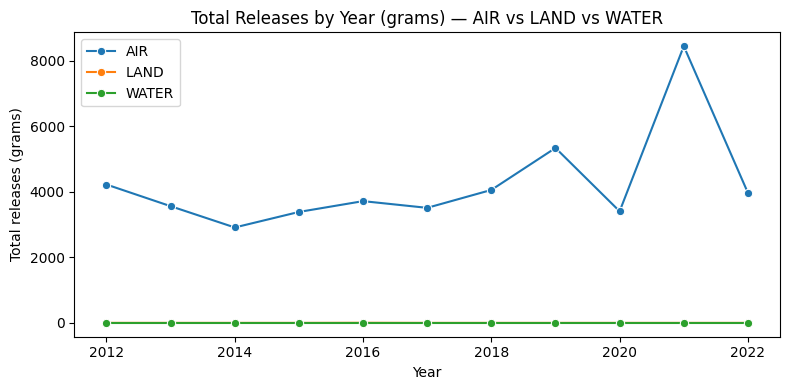

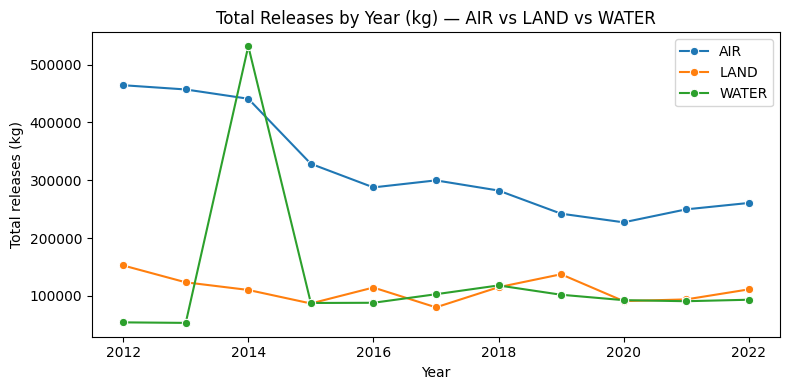

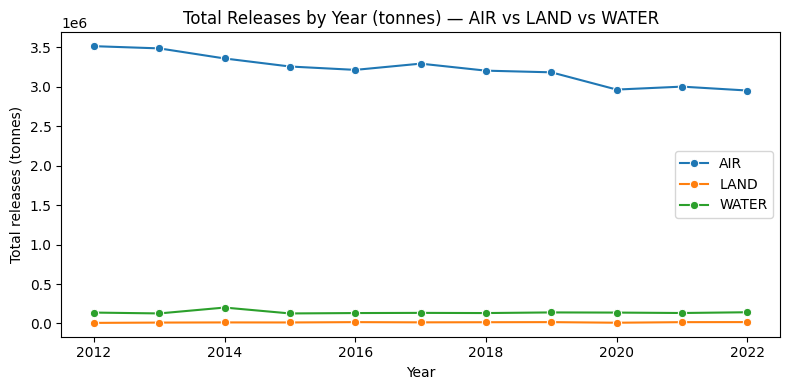

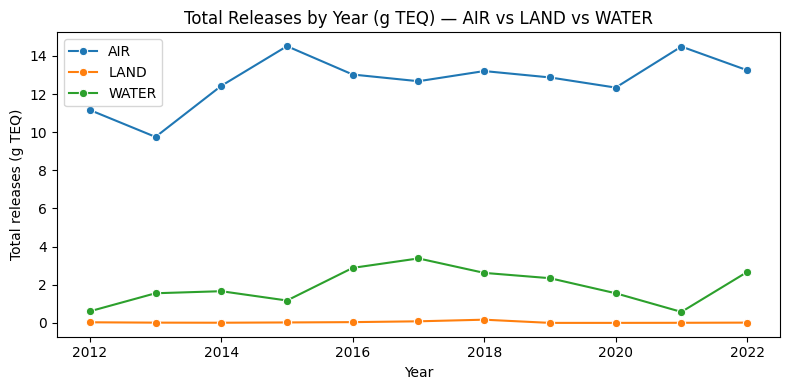

In [19]:
# %%
for unit in units_list:
    # filter data for the selected unit type
    # if no rows exist for that unit, will skip to the next loop.
    df_v = visualization_df[visualization_df[UNITS] == unit].copy()
    if df_v.empty:
        print(f"No data for unit '{unit}'")
        continue

    # aggregate AIR, LAND, WATER totals by year
    # sum() is applied across all facilities for each year.
    by_year = (
        df_v
        .groupby("year_numeric")[["AIR", "LAND", "WATER"]]
        .sum()
        .reset_index()
    )

    #  line chart:
    # - X-axis = Year
    # - Y-axis = Total releases (per group)
    # - Three lines represent AIR, LAND, WATER

    plt.figure(figsize=(8, 4))

    sns.lineplot(data=by_year, x="year_numeric", y="AIR",
                 label="AIR", marker="o")
    sns.lineplot(data=by_year, x="year_numeric", y="LAND",
                 label="LAND", marker="o")
    sns.lineplot(data=by_year, x="year_numeric", y="WATER",
                 label="WATER", marker="o")

    # setting plot title and axis labels for clarity
    plt.title(f"Total Releases by Year ({unit}) — AIR vs LAND vs WATER")
    plt.xlabel("Year")
    plt.ylabel(f"Total releases ({unit})")
    plt.legend()

    # ensuring proper spacing so labels don’t overlap
    plt.tight_layout()

    # displaying the final plot
    plt.show()


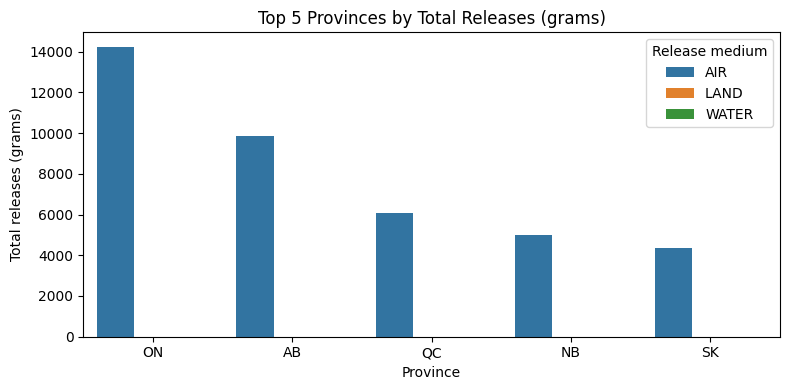

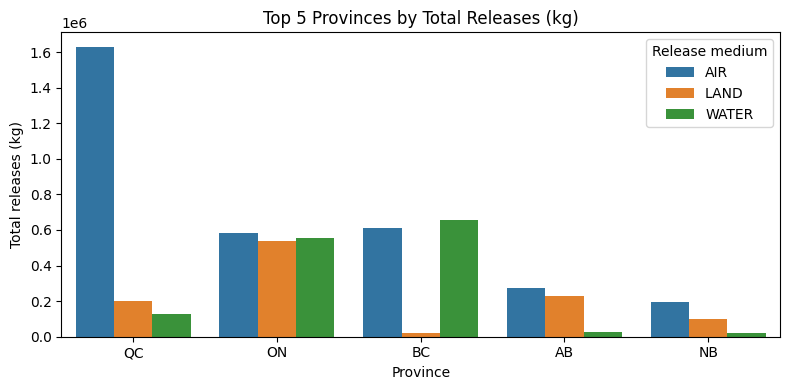

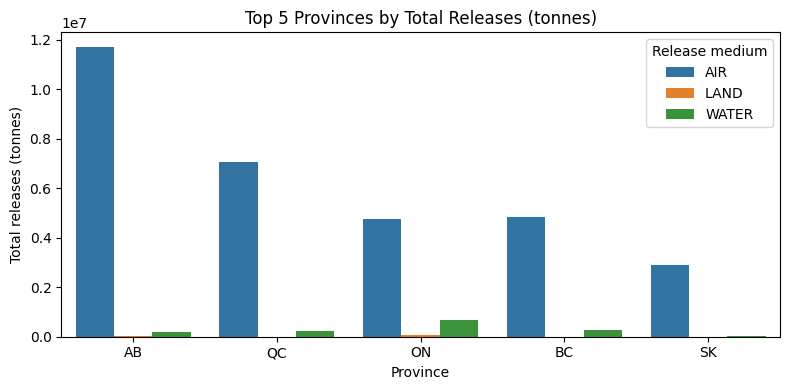

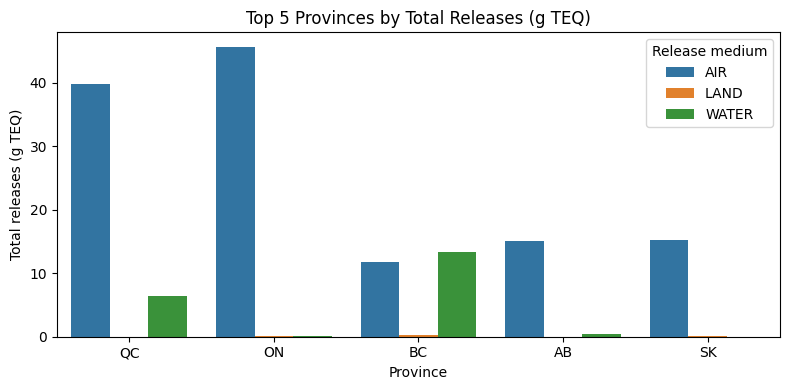

In [20]:
# %%
for unit in units_list:
    # filter dataset to keep only rows measured in the selected
    # unit type
    # if no rows exist for this unit type, will skip it.
    df_v = visualization_df[visualization_df[UNITS] == unit].copy()
    if df_v.empty:
        print(f"No data for unit '{unit}'")
        continue

    # restrict analysis to the most recent 10+ years (more than 2012)
    # this ensures we evaluate modern reporting trends.
    df_v = df_v[df_v["year_numeric"] >= 2012]

    # computing total AIR, LAND, WATER releases for each province.
    # output: DataFrame indexed by province with 3 summed columns.
    province_totals = df_v.groupby(PROVINCE)[["AIR", "LAND", "WATER"]].sum()

    # add overall total across all mediums for ranking
    province_totals["TOTAL"] = province_totals.sum(axis=1)

    # identifying the 5 provinces with the highest total releases.
    # these provinces will form the basis of the bar chart
    first5 = province_totals["TOTAL"].nlargest(5).index
    top5 = province_totals.loc[first5].drop(columns="TOTAL")

    #   PROVINCE, groups, Total
    plot_data = (
        top5
        .reset_index()
        .melt(
            id_vars=PROVINCE,
            value_vars=["AIR", "LAND", "WATER"],
            var_name="Group",
            value_name="Total"
        )
    )

    # create bar plot comparing AIR, LAND, WATER totals for the top 5 provinces
    plt.figure(figsize=(8, 4))
    sns.barplot(data=plot_data, x=PROVINCE, y="Total", hue="Group")

    plt.title(f"Top 5 Provinces by Total Releases ({unit})")
    plt.xlabel("Province")
    plt.ylabel(f"Total releases ({unit})")
    plt.legend(title="Release medium")
    plt.tight_layout()

    # Display the final plot
    plt.show()

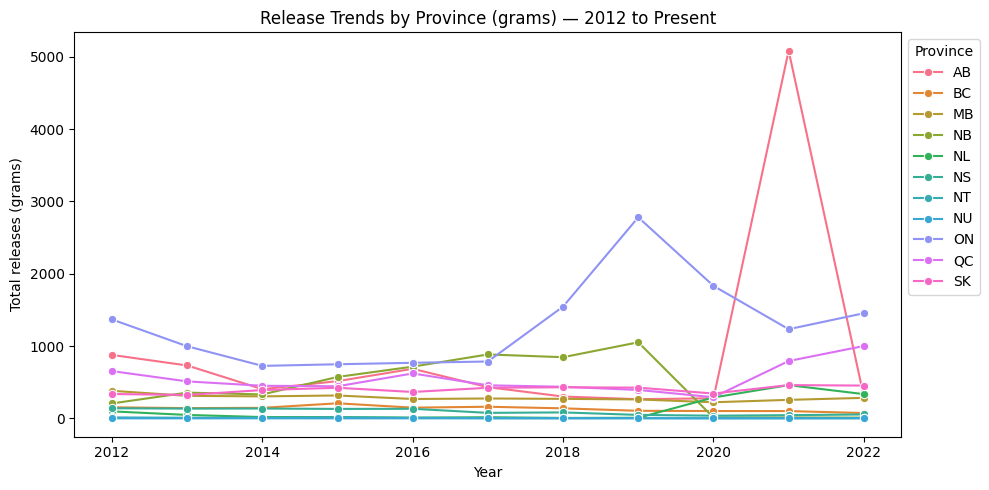

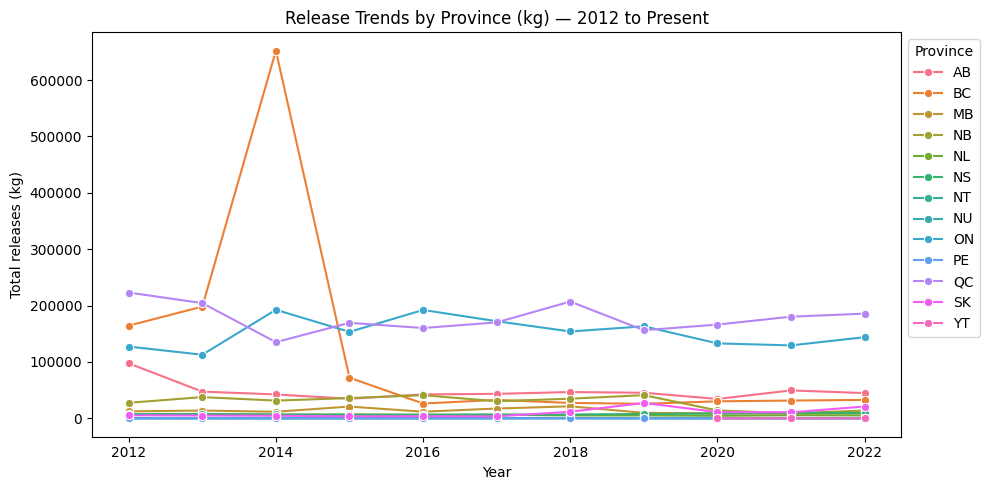

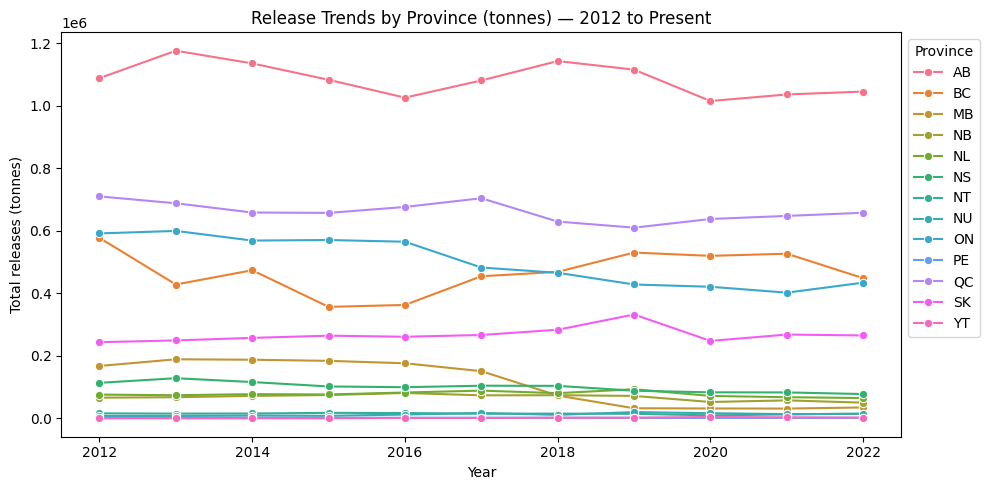

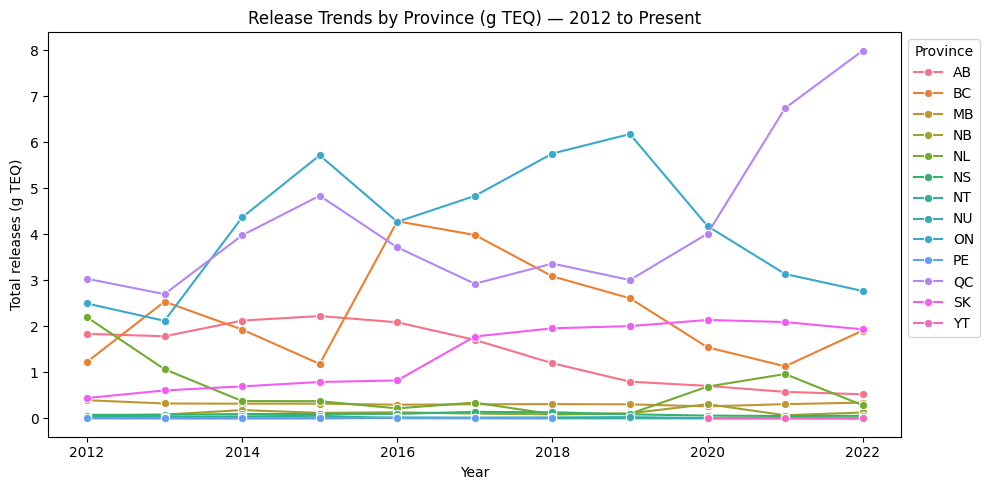

In [21]:
# %%
for unit in units_list:
    # Filter dataset to rows that match the selected unit
    df_v = visualization_df[visualization_df[UNITS] == unit].copy()
    if df_v.empty:
        print(f"No data for unit '{unit}', skipping provinces trend.")
        continue
    df_v = df_v[df_v["year_numeric"] >= 2012]

    # aggregate total releases per province per year
    # PROVINCE, Year_Num, TOTAL
    province_year = (
        df_v.groupby([PROVINCE, "year_numeric"])["TOTAL"]
            .sum()
            .reset_index()
    )

    # line plot showing yearly change in release levels for each province
    plt.figure(figsize=(10, 5))
    sns.lineplot(
        data=province_year,
        x="year_numeric",
        y="TOTAL",
        hue=PROVINCE,
        marker="o"
    )

    # configure plot titles and axis labels for readability
    # right-side legend is used to avoid overlapping lines
    plt.title(f"Release Trends by Province ({unit}) — 2012 to Present")
    plt.xlabel("Year")
    plt.ylabel(f"Total releases ({unit})")
    plt.legend(title="Province", bbox_to_anchor=(1, 1))
    plt.tight_layout()

    # Display the final figure
    plt.show()


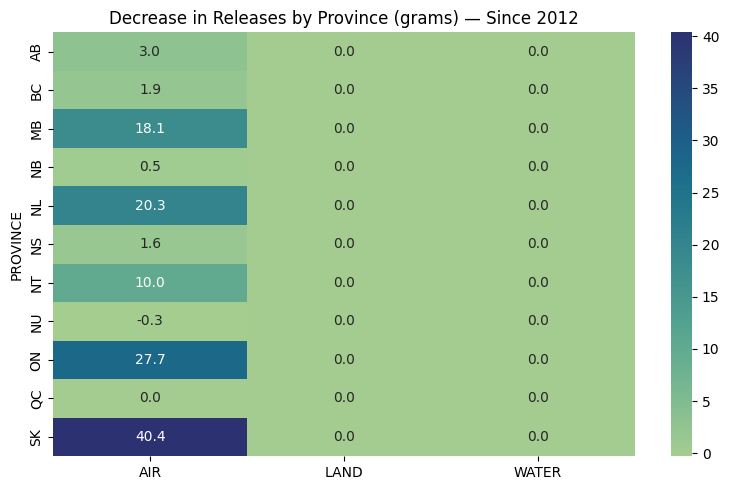

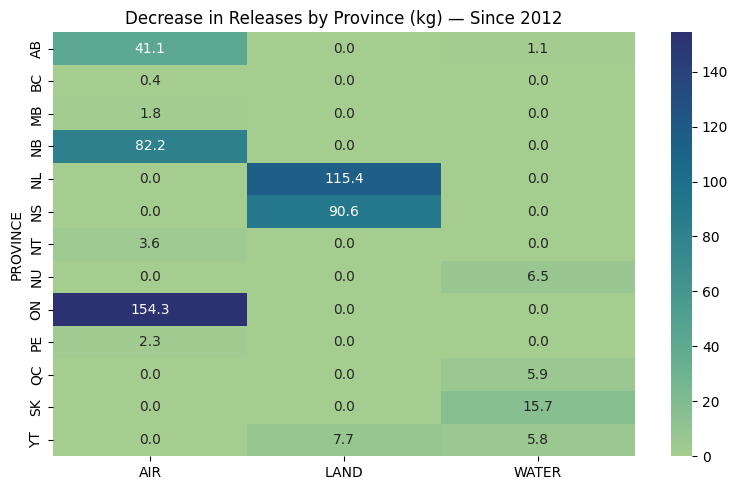

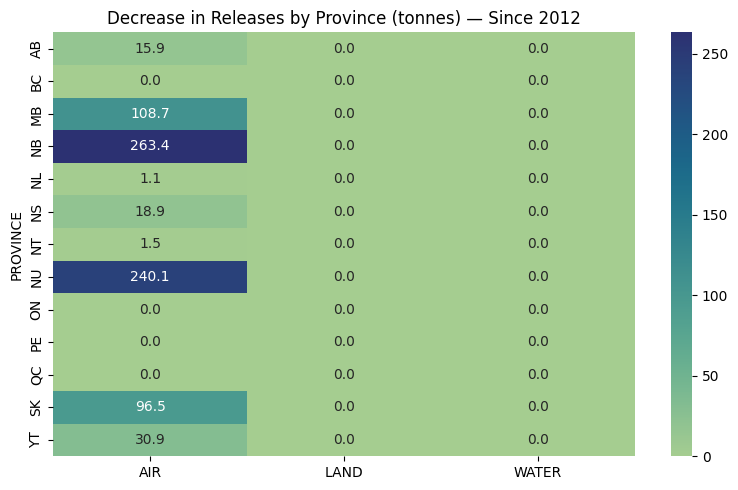

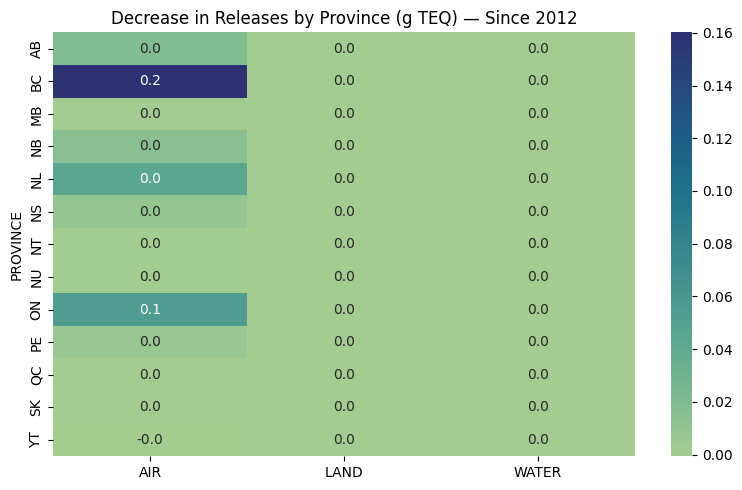

In [22]:
# %%
for unit in units_list:
    # filter dataset to include only rows measured in the selected unit type. if no records exist, skip the loop
    df_v = visualization_df[visualization_df[UNITS] == unit].copy()
    if df_v.empty:
        print(f"No data for unit '{unit}', skipping heatmap.")
        continue

    # keeping only data from 2012 onward. This ensures that the
    # “first” and “last” values correspond to modern reporting.
    df_v = df_v[df_v["year_numeric"] >= 2012]

    # extracting the earliest and latest AIR/LAND/WATER
    # release totals for each province
    #   - Baseline (2012 or earliest available year)
    #   - Most recent year of reporting
    first = df_v.groupby(PROVINCE)[["AIR", "LAND", "WATER"]].first()
    last  = df_v.groupby(PROVINCE)[["AIR", "LAND", "WATER"]].last()

    # compute the decrease in releases:
    #     decrease = first_year - last_year

    # positive values indicate reductions; negative values
    # indicate increases in recent years
    diff = first - last

    # heatmap visualization:
    # Rows: provinces
    # Columns: AIR, LAND, WATER
    # Cell values: magnitude of decrease since 2012
    plt.figure(figsize=(8, 5))
    sns.heatmap(diff, annot=True, fmt=".1f", cmap="crest")

    plt.title(f"Decrease in Releases by Province ({unit}) — Since 2012")
    plt.tight_layout()
    plt.show()

# Feature Encoding

In [23]:
# create totals inside df_clean
df_clean["AIR"] = df_clean[air_release].sum(axis=1)
df_clean["LAND"] = df_clean[land_release].sum(axis=1)
df_clean["WATER"] = df_clean[water_release].sum(axis=1)
df_clean["TOTAL"] = df_clean["AIR"] + df_clean["LAND"] + df_clean["WATER"]

In [25]:
# encode province
province_encoded = pd.get_dummies(df_clean["PROVINCE"], prefix="PROV")

# encode the groups (AIR/LAND/WATER)
df_clean["MAIN_GROUPS"] = (
    df_clean[["AIR", "LAND", "WATER"]]
    .idxmax(axis=1)
)

medium_encoded = pd.get_dummies(df_clean["MAIN_GROUPS"], prefix="MEDIUM")

# combine encoded columns into dataframe
df_clean = pd.concat(
    [
        df_clean,
        province_encoded,
        medium_encoded
    ],
    axis=1
)

1. Making AIR / LAND / WATER / TOTAL

We grouped the release columns into three big ones (AIR, LAND, WATER) and added a TOTAL.

2. Encoding Province

Province is categorical column and is important for our problem, so we one-hot encoded it.

3. Encoding Units

Since releases come in different units (grams, kg, tonnes…), we encoded the units too.

4. Release Groups

We checked which groups (AIR / LAND / WATER) is the biggest for each row and turned that into a simple category, then we encoded it.

# Feature Engineering

In [26]:
from scipy.stats import linregress
import numpy as np
import pandas as pd

features_df = df_clean.copy()

#  Tonnes Fix
province_year_unit = (
    features_df
    .groupby([PROVINCE, YEAR, UNITS])[["AIR", "LAND", "WATER", "TOTAL"]]
    .sum()
    .reset_index()
)

# Convert all to Tonnes
unit_multipliers = {"grams": 1e-6, "kg": 1e-3, "tonnes": 1, "g TEQ": 1e-6}
province_year_unit["conv_factor"] = province_year_unit[UNITS].map(unit_multipliers)
for col in ["AIR", "LAND", "WATER", "TOTAL"]:
    province_year_unit[col] = province_year_unit[col] * province_year_unit["conv_factor"]

# Re-aggregate to merge rows
province_year_unit["year_numeric"] = province_year_unit[YEAR].dt.year
df_final = (
    province_year_unit
    .groupby([PROVINCE, "year_numeric"])[["AIR", "LAND", "WATER", "TOTAL"]]
    .sum()
    .reset_index()
    .sort_values([PROVINCE, "year_numeric"])
)


# A. Smoothed Rolling Averages (Less noisy than raw Lag 1)
df_final["rolling_3yr_mean"] = (
    df_final.groupby(PROVINCE)["TOTAL"]
    .transform(lambda x: x.rolling(3, min_periods=1).mean().shift(1))
)
df_final["rolling_5yr_mean"] = (
    df_final.groupby(PROVINCE)["TOTAL"]
    .transform(lambda x: x.rolling(5, min_periods=1).mean().shift(1))
)

# B. Momentum (Year-over-Year % Change)
df_final["pct_change_1yr"] = (
    df_final.groupby(PROVINCE)["TOTAL"]
    .pct_change()
    .fillna(0)
    .replace([np.inf, -np.inf], 0)
)

# C. Trend & Volatility
def rolling_trend(series, window=3):
    if len(series) < window: return np.nan
    slope, _, _, _, _ = linregress(np.arange(window), series[-window:])
    return slope

df_final["trend_3yr"] = (
    df_final.groupby(PROVINCE)["TOTAL"]
    .transform(lambda x: x.rolling(3, min_periods=2).apply(rolling_trend, raw=False))
)

df_final["volatility_3yr"] = (
    df_final.groupby(PROVINCE)["TOTAL"]
    .transform(lambda x: x.rolling(3, min_periods=2).std())
)

# D. Contextual Features
# National Trend (Is the whole country going up or down?)
df_final["national_trend"] = df_final.groupby("year_numeric")["TOTAL"].transform("mean")

# Province Size Category (0=Small, 1=Medium, 2=Large)
# We use numeric labels so the ML model can read it directly
province_total_avg = df_final.groupby(PROVINCE)["TOTAL"].transform("mean")
df_final["province_size_category"] = pd.qcut(
    province_total_avg, q=3, labels=[0, 1, 2]
)

#
# CLEANUP
# Drop rows where rolling windows couldn't be calculated (start of dataset)
df_final = df_final.dropna(subset=["rolling_3yr_mean", "trend_3yr"]).reset_index(drop=True)

print(f"Feature Engineering Complete")
print(f"Final Shape: {df_final.shape}")
df_final.head()

Feature Engineering Complete
Final Shape: (273, 13)


,PROVINCE,year_numeric,AIR,LAND,WATER,TOTAL,rolling_3yr_mean,rolling_5yr_mean,pct_change_1yr,trend_3yr,volatility_3yr,national_trend,province_size_category
0,AB,2002,8.758420e+05,639.021487,15675.335420,8.921563e+05,3.845758e+04,38457.579699,22.595221,426526.024081,492883.619751,328738.171457,2
1,AB,2003,1.202547e+06,278.495782,17007.911215,1.219834e+06,3.230238e+05,323023.825303,0.367287,591011.430209,610253.587992,356048.520625,2
2,AB,2004,1.233295e+06,241.239931,17386.330152,1.250922e+06,7.166003e+05,547226.306844,0.025486,179383.003890,198767.891889,363664.514151,2
3,AB,2005,1.213399e+06,218.846498,16021.818942,1.229640e+06,1.120971e+06,687965.510334,-0.017013,4903.113189,15893.393317,351897.116451,2
4,AB,2006,1.230786e+06,235.361392,16953.661313,1.247975e+06,1.233465e+06,926072.652232,0.014911,-1473.622406,11531.120750,347781.066063,2


year_numeric

Description: The calendar year converted into a continuous integer format (e.g., 2015, 2016).

Purpose: Allows the model to interpret time progression mathematically, enabling it to detect long-term temporal shifts (e.g., gradual improvements in technology over decades).

rolling_3yr_mean / rolling_5yr_mean

Description: The average TOTAL releases calculated over the previous 3 (or 5) years.

Purpose: Serves as a smoothed baseline. Unlike a raw "Lag 1" (which can be noisy due to one-off spikes), this gives the model a stable "normal" pollution level for the province to anchor its prediction.

pct_change_1yr

Description: The year-over-year percentage growth or decline in pollution.

Purpose: Captures immediate momentum. It informs the model about the recent intensity of change (e.g., a +50% spike vs. a -2% gradual decline).

trend_3yr

Description: The calculated slope of the linear regression line over the last 3 years of data.

Purpose: Measures the velocity and direction of the trend. It tells the model if the pollution is on a steep upward trajectory, a steep downward drop, or plateauing.

volatility_3yr

Description: The rolling standard deviation of the TOTAL releases over the previous 3 years.

Purpose: Measures stability. High volatility signals to the model that the province is erratic (prone to unpredictable spikes), while low volatility suggests consistent, predictable behavior.

national_trend

Description: The average pollution level of the entire country for that specific year.

Purpose: Provides macro-level context. It helps the model differentiate between a local pollution event and a nationwide trend (e.g., an economic recession lowering pollution everywhere).

province_size_category

Description: An ordinal integer label (0 = Small, 1 = Medium, 2 = Large) based on the province's historical average pollution.

Purpose: Acts as a scaling factor. It ensures the model understands the "magnitude" of the province, preventing it from predicting massive pollution levels for tiny provinces or vice versa.

# Normalization

In [27]:
from sklearn.preprocessing import RobustScaler

# 1. Define columns to scale
# We only scale the continuous features. We skip 'TOTAL' (target) and 'province_size_category' (categorical).
num_cols = [
    "rolling_3yr_mean",
    "rolling_5yr_mean",
    "pct_change_1yr",
    "trend_3yr",
    "volatility_3yr",
    "national_trend"
]

# 2. Filter to ensure we only try to scale columns that actually exist
cols_to_scale = [c for c in num_cols if c in df_final.columns]

# 3. Scale
scaler = RobustScaler()
df_final[cols_to_scale] = scaler.fit_transform(df_final[cols_to_scale])

print("Scaled features successfully:", cols_to_scale)
print("Note: 'TOTAL' was intentionally skipped to preserve target units (tonnes).")

Scaled features successfully: ['rolling_3yr_mean', 'rolling_5yr_mean', 'pct_change_1yr', 'trend_3yr', 'volatility_3yr', 'national_trend']
Note: 'TOTAL' was intentionally skipped to preserve target units (tonnes).


We apply RobustScaler to all continuous features (e.g., rolling means, trends, volatility).

Why: Machine learning models struggle when features have vastly different ranges (e.g., pct_change is small decimals, while rolling_mean is in thousands). Scaling brings them to a comparable level.

Why RobustScaler?: Unlike Standard Scaler, this method uses the median and IQR (Interquartile Range) instead of the mean. This handles the extreme outliers in our pollution data without letting them skew the entire dataset.

Note: We purposefully do not scale the target (TOTAL) so our predictions remain in readable units (tonnes).

# Feature Selection

NPRI Emission Prediction Dataset:
273 Records
8 Features


,year_numeric,rolling_3yr_mean,rolling_5yr_mean,pct_change_1yr,trend_3yr,volatility_3yr,national_trend,province_size_category
0,2002,-0.157497,-0.168042,150.846643,37.167552,15.500054,0.691644,2
1,2003,0.506623,0.499088,2.500563,51.498683,19.254438,1.080053,2
2,2004,1.425151,1.024702,0.219431,15.634705,6.091997,1.188368,2
3,2005,2.368869,1.354648,-0.064203,0.432783,0.242280,1.021012,2
4,2006,2.631409,1.912860,0.148855,-0.122803,0.102741,0.962473,2


All features are numerical (province_size_category is ordinal 0-2)


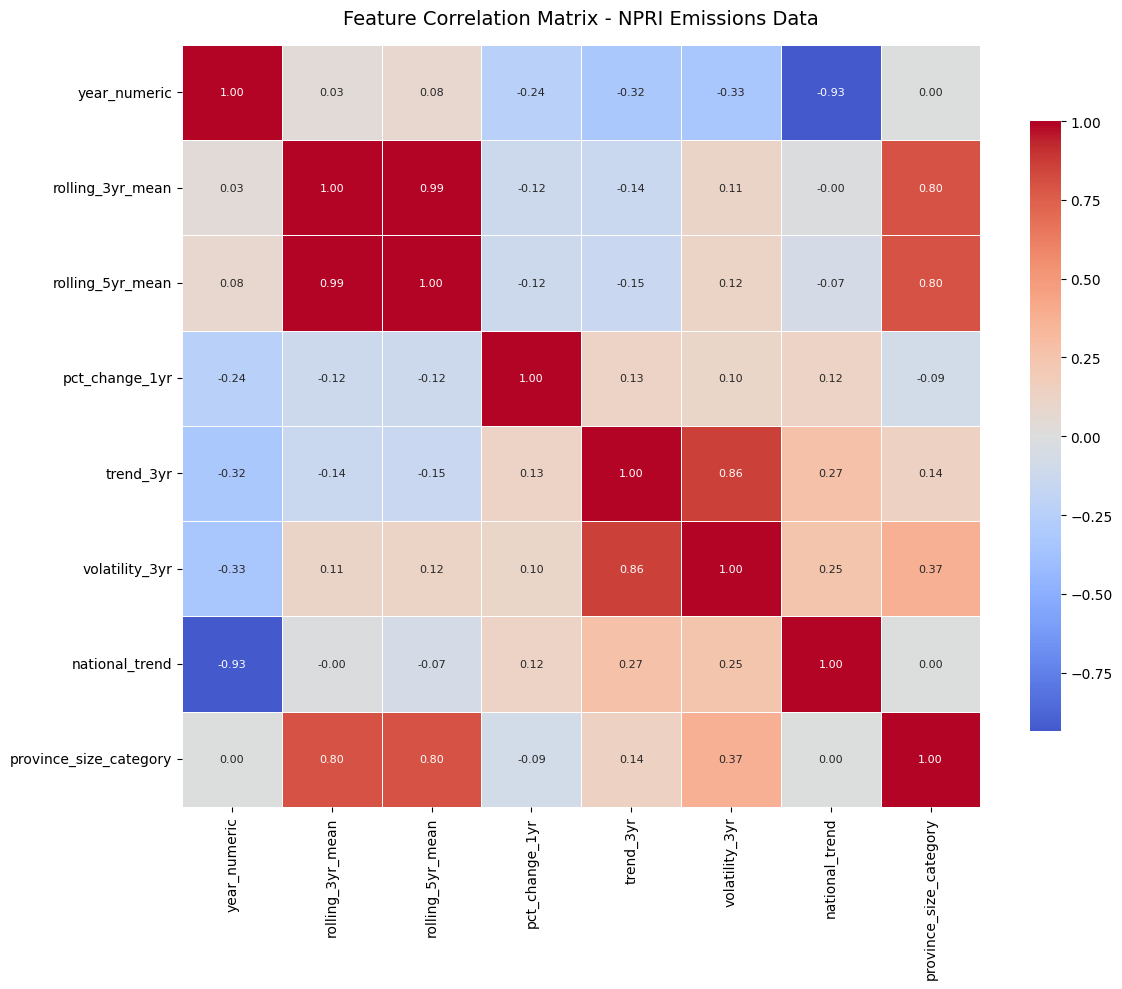


Correlation Threshold: 0.7
Remaining Features: 4
Dropped Features: ['national_trend', 'province_size_category', 'rolling_5yr_mean', 'volatility_3yr']

Correlation Threshold: 0.75
Remaining Features: 4
Dropped Features: ['national_trend', 'province_size_category', 'rolling_5yr_mean', 'volatility_3yr']

Correlation Threshold: 0.8
Remaining Features: 5
Dropped Features: ['national_trend', 'rolling_5yr_mean', 'volatility_3yr']

Correlation Threshold: 0.85
Remaining Features: 5
Dropped Features: ['national_trend', 'rolling_5yr_mean', 'volatility_3yr']

Correlation Threshold: 0.9
Remaining Features: 6
Dropped Features: ['national_trend', 'rolling_5yr_mean']

Correlation Threshold: 0.95
Remaining Features: 7
Dropped Features: ['rolling_5yr_mean']


,Threshold,Features_Remaining,Features_Dropped
0,0.70,4,4
1,0.75,4,4
2,0.80,5,3
3,0.85,5,3
4,0.90,6,2
5,0.95,7,1



Selected optimal correlation threshold: 0.9

Final selected features (6): ['year_numeric', 'rolling_3yr_mean', 'pct_change_1yr', 'trend_3yr', 'volatility_3yr', 'province_size_category']

Dropped due to high correlation: ['national_trend', 'rolling_5yr_mean']


In [28]:
# drop features that are highly correlated with each other
def remove_correlated_features(dataset, threshold):
    df = dataset.copy()
    features_to_drop = set()
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                features_to_drop.add(colname)

    df.drop(features_to_drop, axis=1, inplace=True)
    return df

# cleaned and engineered features from df_final
data = df_final.copy()

# Prepare features
excluded_cols = {PROVINCE, YEAR, UNITS, 'AIR', 'LAND', 'WATER', 'TOTAL'}
feature_cols = [col for col in data.columns
                if col not in excluded_cols
                and not col.startswith("PROV_")
                and not col.startswith("UNIT_")]

features_data = data[feature_cols].copy()

print(f"NPRI Emission Prediction Dataset:")
print(f"{features_data.shape[0]} Records")
print(f"{features_data.shape[1]} Features")

display(features_data.head())
print("All features are numerical (province_size_category is ordinal 0-2)")

# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = features_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",
            fmt='.2f', annot_kws={"size": 8}, center=0,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Feature Correlation Matrix - NPRI Emissions Data", fontsize=14, pad=15)
plt.tight_layout()
plt.show()

# Testing different correlation thresholds
correlation_thresholds = [0.70, 0.75, 0.80, 0.85, 0.90, 0.95]

results = []
for threshold in correlation_thresholds:
    reduced_data = remove_correlated_features(features_data, threshold)
    num_features = reduced_data.shape[1]
    dropped_features = set(features_data.columns) - set(reduced_data.columns)

    results.append({
        'Threshold': threshold,
        'Features_Remaining': num_features,
        'Features_Dropped': len(dropped_features),
        'Dropped_List': sorted(list(dropped_features))
    })

    print(f"\nCorrelation Threshold: {threshold}")
    print(f"Remaining Features: {num_features}")
    if dropped_features:
        print(f"Dropped Features: {sorted(list(dropped_features))}")
    else:
        print("No features dropped")

# Display summary table and select optimal threshold
summary_df = pd.DataFrame(results)[['Threshold', 'Features_Remaining', 'Features_Dropped']]
display(summary_df)

# For trend prediction, we want to keep important features even if correlated
# Use a higher threshold (0.90 or 0.95) to preserve trend signals
optimal_threshold = 0.90
print(f"\nSelected optimal correlation threshold: {optimal_threshold}")

final_features_data = remove_correlated_features(features_data, optimal_threshold)
selected_features = final_features_data.columns.tolist()

print(f"\nFinal selected features ({len(selected_features)}): {selected_features}")

# Show which features were dropped
dropped_features = set(features_data.columns) - set(selected_features)
if dropped_features:
    print(f"\nDropped due to high correlation: {sorted(list(dropped_features))}")

Feature Selection: Correlation Analysis
Method: We used Pearson correlation to identify linear relationships between features. This allows us to check whether any engineered features are essentially duplicates of each other (multicollinearity), which can harm models like Linear Regression and Lasso by inflating variance or causing unstable coefficients.

Threshold Selection: We tested thresholds from 0.70 to 0.95 and selected 0.90 as the optimal balance between reducing noise and preserving information.

Result:

Threshold: 0.90

Impact: Reduced feature set from 8 to 6 features.

Justification for Drops:

Dropped rolling_5yr_mean: This was nearly identical to rolling_3yr_mean (correlation > 0.90). Since both represent the "historical baseline," keeping both is redundant. We kept the 3-year mean as it adapts faster to recent changes.

Dropped national_trend: This feature likely showed extremely high correlation with year_numeric (since national pollution has a consistent trend over time). By removing it, we force the model to look at specific province dynamics rather than just the general passage of time.

# Plotly:

In [29]:
import plotly.express as px

trend = visualization_df.groupby("year_numeric")[["AIR", "LAND", "WATER", "TOTAL"]].sum().reset_index()

fig = px.line(trend, x="year_numeric", y=["AIR", "LAND", "WATER", "TOTAL"],
              markers=True, title="Pollution Releases Over Time (2012–2022)")
fig.show()

In [30]:
first = visualization_df.groupby("PROVINCE")[["AIR", "LAND", "WATER"]].first()
last  = visualization_df.groupby("PROVINCE")[["AIR", "LAND", "WATER"]].last()

diff = first - last
diff["TOTAL_CHANGE"] = diff.sum(axis=1)

top5 = diff["TOTAL_CHANGE"].nlargest(5).reset_index()

fig = px.bar(top5, x="PROVINCE", y="TOTAL_CHANGE",
             title="Top 5 Provinces by Largest Decrease in Releases (Historical)",
             labels={"TOTAL_CHANGE": "Total Reduction"})
fig.show()

In [31]:
map_df = visualization_df.groupby("PROVINCE")[["Latitude", "Longitude", "TOTAL"]].median().reset_index()

fig = px.scatter_mapbox(map_df, lat="Latitude", lon="Longitude", size="TOTAL",
                       hover_name="PROVINCE",
                       title="Emission Hotspots Across Canada",
                       zoom=3)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [32]:
if "NAICS Title / Titre Code_SCIAN" in visualization_df.columns:
    industry_df = (visualization_df.groupby("NAICS Title / Titre Code_SCIAN")["TOTAL"]
                   .sum().reset_index().sort_values("TOTAL", ascending=False).head(10))

    fig = px.bar(industry_df, x="TOTAL", y="NAICS Title / Titre Code_SCIAN",
                 orientation="h",
                 title="Top 10 Industries by Pollution Level")
    fig.show()
else:
    print("NAICS industry column not found – skipping industry chart.")

# Machine Learning Model

FINAL ML PIPELINE - ROBUST TIME SERIES
Train size: 145 | Test size: 63

TRAINING RESULTS
Model                | CV MAE     | Test MAE   | Test R2  | Status
Linear Regression    | 83766      | 54565      | 0.946    | Stable
Ridge                | 75860      | 56272      | 0.944    | Stable
Lasso                | 83760      | 54564      | 0.946    | Stable
ElasticNet           | 131370     | 101694     | 0.802    | Stable
Random Forest        | 55754      | 39876      | 0.952    | Stable
Gradient Boosting    | 63637      | 38364      | 0.950    | Stable

Best Model: Random Forest (R2: 0.952)

FUTURE PREDICTIONS: 5-YEAR OUTLOOK
Province                  | Current    | In 5 Years | Change     | % Change
PE                        | 1513       | 963        | -550       | -36.3%
AB                        | 1045594    | 670392     | -375202    | -35.9%
QC                        | 657946     | 603909     | -54037     | -8.2%
ON                        | 434351     | 422064     | -12287     | -2.

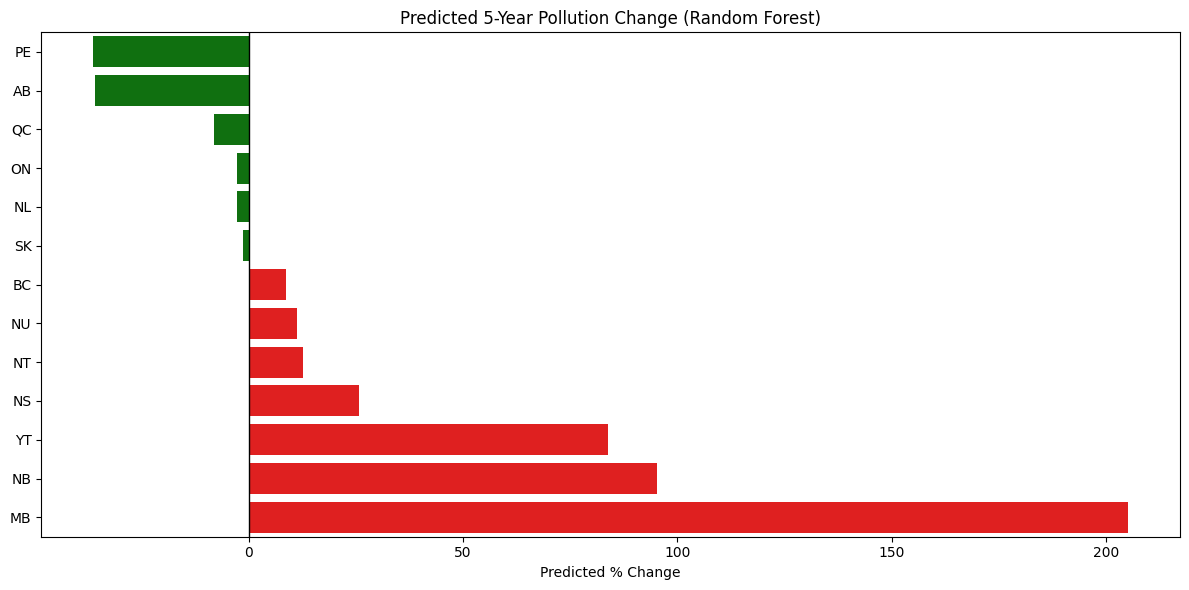

In [34]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("FINAL ML PIPELINE - ROBUST TIME SERIES")

# Prepare Data
ml = df_final.copy()
ml = ml.sort_values([PROVINCE, 'year_numeric']).reset_index(drop=True)

# Target: Predict total 5 years in future
ml['target_5yr_total'] = ml.groupby(PROVINCE)['TOTAL'].shift(-5)

features = [
    'year_numeric',
    'rolling_3yr_mean',
    'pct_change_1yr', 'trend_3yr', 'volatility_3yr',
    'province_size_category'
]
features += [c for c in ml.columns if c.startswith("PROV_")]

ml = ml.dropna(subset=features + ['target_5yr_total']).reset_index(drop=True)
ml['province_size_category'] = ml['province_size_category'].astype(int)

# Chronological Split
ml = ml.sort_values('year_numeric').reset_index(drop=True)
split_idx = int(len(ml) * 0.70)

X_train = ml.iloc[:split_idx][features]
y_train = ml.iloc[:split_idx]['target_5yr_total']

X_test = ml.iloc[split_idx:][features]
y_test = ml.iloc[split_idx:]['target_5yr_total']

print(f"Train size: {len(X_train)} | Test size: {len(X_test)}")

# 1. Define Time Series Split (3 splits = 3 validation rounds)
tscv = TimeSeriesSplit(n_splits=3)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0, max_iter=10000),
    "ElasticNet": ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.05, random_state=42)
}

results = []
best_model = None
best_r2 = -np.inf
best_name = ""

print("\nTRAINING RESULTS")
print(f"{'Model':<20} | {'CV MAE':<10} | {'Test MAE':<10} | {'Test R2':<8} | {'Status'}")

for name, model in models.items():
    # 2. Time Series Cross Validation (The "Stability Check")
    # We use negative MAE because sklearn scores are 'higher is better', so errors are negative
    cv_scores = cross_val_score(model, X_train, y_train, cv=tscv, scoring='neg_mean_absolute_error')
    cv_mae = -cv_scores.mean() # Convert back to positive MAE

    # Train on full training set
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)

    test_mae = mean_absolute_error(y_test, test_preds)
    test_r2 = r2_score(y_test, test_preds)

    # Compare CV (Validation) vs Test
    # If Test MAE is much worse than CV MAE, it might be overfitting to the past
    if test_mae > cv_mae * 1.5:
        status = "Overfit"
    else:
        status = "Stable"

    print(f"{name:<20} | {cv_mae:<10.0f} | {test_mae:<10.0f} | {test_r2:<8.3f} | {status}")

    # Save best model logic (Prioritize R2, but ensure stability)
    if test_r2 > best_r2 and status == "Stable":
        best_r2 = test_r2
        best_model = model
        best_name = name

if best_model:
    print(f"\nBest Model: {best_name} (R2: {best_r2:.3f})")

# Future Predictions
print("\nFUTURE PREDICTIONS: 5-YEAR OUTLOOK")

# Get most recent data for each province
latest_data = df_final.sort_values('year_numeric').groupby(PROVINCE).tail(1).copy()
latest_data['province_size_category'] = latest_data['province_size_category'].astype(int)
X_latest = latest_data[features]

# Predict
latest_data['predicted_5yr_total'] = best_model.predict(X_latest)
latest_data['predicted_change'] = latest_data['predicted_5yr_total'] - latest_data['TOTAL']
latest_data['pct_change'] = (latest_data['predicted_change'] / latest_data['TOTAL']) * 100

rankings = latest_data.sort_values('pct_change', ascending=True)

print(f"{'Province':<25} | {'Current':<10} | {'In 5 Years':<10} | {'Change':<10} | {'% Change'}")

for index, row in rankings.iterrows():
    print(f"{row[PROVINCE]:<25} | {row['TOTAL']:<10.0f} | {row['predicted_5yr_total']:<10.0f} | {row['predicted_change']:<+10.0f} | {row['pct_change']:+.1f}%")

plt.figure(figsize=(12, 6))
colors = ['green' if x < 0 else 'red' for x in rankings['pct_change']]
sns.barplot(x='pct_change', y=PROVINCE, data=rankings, palette=colors)
plt.axvline(0, color='black', linewidth=1)
plt.title(f'Predicted 5-Year Pollution Change ({best_name})')
plt.xlabel('Predicted % Change')
plt.ylabel('')
plt.tight_layout()
plt.show()

1. Goal
The objective is to predict the absolute total pollution (in tonnes) for each province 5 years into the future. This allows us to identify which regions are on a trajectory to improve and which are worsening.

2. Time Series Strategy (Anti-Leakage)
Because this is forecasting, we cannot use random shuffling. We strictly sort by year and split the data chronologically (Training on the past, Testing on the future). This prevents "data leakage," ensuring the model never "sees" the future during training.

3. Feature Engineering
We use lagged features to capture momentum:

Target: We shift the actual pollution column back by 5 years (target_5yr_total).

Inputs: We use rolling_3yr_mean and trend_3yr to show the model the recent "velocity" of pollution changes.

4. Model Competition & Stability
We train 6 models (Linear, Ridge, Lasso, ElasticNet, Random Forest, Gradient Boosting).

We use TimeSeriesSplit (Rolling Cross-Validation) to check stability.

We disqualify any model where the Test Error is significantly higher than the Validation Error (Overfitting Check).

5. Final Output Logic
The pipeline selects the most accurate "Stable" model and feeds it the most recent available data for every province. It then calculates the % Change between the current actual levels and the predicted levels 5 years from now.

In [42]:
print("DETAILED BREAKDOWN: AIR vs LAND vs WATER")


#store results here
breakdown_results = []

# The 3 specific targets we want to check
targets = ['AIR', 'LAND', 'WATER']

# Get the most recent data (Current values)
latest = df_final.sort_values('year_numeric').groupby(PROVINCE).tail(1).copy()
latest['province_size_category'] = latest['province_size_category'].astype(int)
X_latest = latest[features] # Same features as before

for target_name in targets:
    print(f"Predicting {target_name}...")

    # 1. Create a temporary training set for this specific target
    temp_ml = df_final.copy()
    temp_ml = temp_ml.sort_values([PROVINCE, 'year_numeric']).reset_index(drop=True)

    # Create the 5-year future target for THIS specific medium
    col_name = f'target_5yr_{target_name}'
    temp_ml[col_name] = temp_ml.groupby(PROVINCE)[target_name].shift(-5)

    # Clean NaNs
    temp_ml = temp_ml.dropna(subset=features + [col_name]).reset_index(drop=True)
    temp_ml['province_size_category'] = temp_ml['province_size_category'].astype(int)

    # Split (Same chronological logic)
    split_idx = int(len(temp_ml) * 0.70)
    X_train_temp = temp_ml.iloc[:split_idx][features]
    y_train_temp = temp_ml.iloc[:split_idx][col_name]

    # 2. Retrain the best model type on this specific target
    # We clone the best model structure (e.g., Random Forest) but train on new data
    from sklearn.base import clone
    specific_model = clone(best_model)
    specific_model.fit(X_train_temp, y_train_temp)

    # 3. Predict for the future
    # Save the prediction into our results
    latest[f'pred_5yr_{target_name}'] = specific_model.predict(X_latest)
    latest[f'change_{target_name}'] = latest[f'pred_5yr_{target_name}'] - latest[target_name]

# FINAL RANKING TABLE
rankings_detailed = latest[[PROVINCE, 'change_AIR', 'change_LAND', 'change_WATER']].copy()

# Calculate 'Total Change' (Sum of the 3 parts)
rankings_detailed['Sum_Change'] = (
    rankings_detailed['change_AIR'] +
    rankings_detailed['change_LAND'] +
    rankings_detailed['change_WATER']
)

# Sort by the biggest drop (Sum_Change)
rankings_detailed = rankings_detailed.sort_values('Sum_Change', ascending=True)

print(f"\n{'Province':<10} | {'Air Change':<12} | {'Land Change':<12} | {'Water Change':<12} | {'TOTAL CHANGE'}")
print("-" * 70)

for index, row in rankings_detailed.iterrows():
    print(f"{row[PROVINCE]:<10} | {row['change_AIR']:<+12.0f} | {row['change_LAND']:<+12.0f} | {row['change_WATER']:<+12.0f} | {row['Sum_Change']:<+10.0f}")

DETAILED BREAKDOWN: AIR vs LAND vs WATER
Predicting AIR...
Predicting LAND...
Predicting WATER...

Province   | Air Change   | Land Change  | Water Change | TOTAL CHANGE
----------------------------------------------------------------------
AB         | -440459      | -911         | +33897       | -407473   
QC         | -225295      | +7611        | +23601       | -194083   
SK         | -85240       | +421         | +2956        | -81863    
NS         | -16957       | -11          | +1148        | -15820    
ON         | +41966       | -7360        | -42054       | -7448     
NT         | -775         | -9           | +28          | -756      
NU         | -145         | +12          | +13          | -119      
NL         | +752         | +373         | +552         | +1677     
PE         | +6802        | +7           | -1266        | +5543     
YT         | +5782        | +8           | +78          | +5868     
MB         | +12506       | -356         | -4697        | +7453     


To improve the accuracy of our forecasts, we moved away from predicting a single "Total" number and instead used a bottom-up approach. We took our best-performing model architecture and trained three separate versions of it: one specifically for Air, one for Land, and one for Water. This allowed each model to focus entirely on the unique trends and volatility of that specific release type, rather than trying to generalize across all three at once.

Once trained, we had each model generate its own 5-year forecast, which we then summed together to get the final projected total. This method is generally more reliable because it prevents a large drop in one category (like Air) from masking a smaller but significant rise in another (like Land). By building the total from these individual components, we ensure the final ranking reflects the actual underlying shifts in the data.

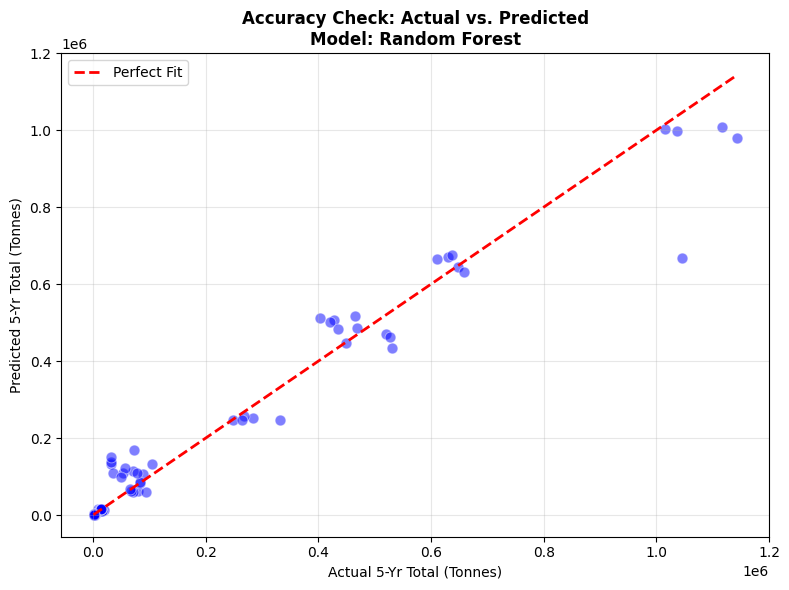

In [39]:
# PLOT 1: ACTUAL VS PREDICTED
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# 1. Get predictions from the best model
test_preds = best_model.predict(X_test)

# 2. Plot the scatter
sns.scatterplot(x=y_test, y=test_preds, color='blue', alpha=0.5, s=60)

min_val = min(y_test.min(), test_preds.min())
max_val = max(y_test.max(), test_preds.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')

plt.title(f'Accuracy Check: Actual vs. Predicted\nModel: {best_name}', fontweight='bold')
plt.xlabel('Actual 5-Yr Total (Tonnes)')
plt.ylabel('Predicted 5-Yr Total (Tonnes)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

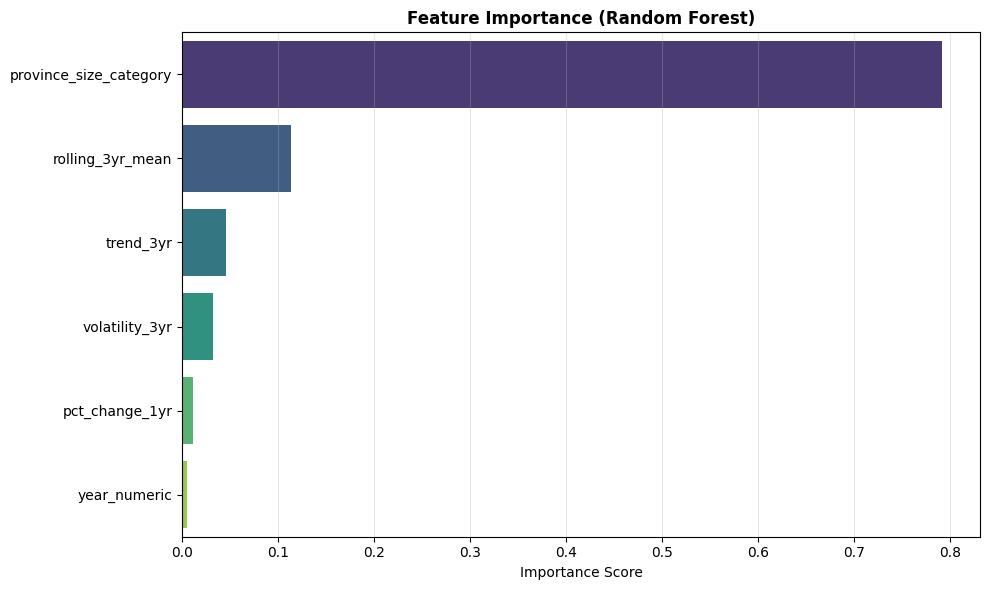

In [40]:
# PLOT 2: FEATURE IMPORTANCE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# 1. Extract Importance depending on model type
if hasattr(best_model, 'feature_importances_'):
    # For Random Forest / Gradient Boosting
    importances = best_model.feature_importances_
    title = f'Feature Importance ({best_name})'
    palette = 'viridis'

elif hasattr(best_model, 'coef_'):
    # For Linear Regression / Ridge / Lasso
    importances = np.abs(best_model.coef_) # Absolute value tells us strength
    title = f'Feature Coefficients ({best_name})'
    palette = 'coolwarm'

# 2. Create a clean DataFrame for plotting
imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
imp_df = imp_df.sort_values('Importance', ascending=False)

# 3. Plot
sns.barplot(x='Importance', y='Feature', data=imp_df, palette=palette)
plt.title(title, fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()